In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
categories = data.target_names
#Training the data on these categories
train = fetch_20newsgroups(subset='train',categories=categories)
#Testing the data on these categories
test = fetch_20newsgroups(subset='test',categories=categories)
print(train.data[11])

From: david@terminus.ericsson.se (David Bold)
Subject: Re: Question for those with popular morality
Reply-To: david@terminus.ericsson.se
Distribution: world
Organization: Camtec Electronics (Ericsson), Leicester, England
Lines: 77
Nntp-Posting-Host: bangkok

In article 17570@freenet.carleton.ca, ad354@Freenet.carleton.ca (James Owens) writes:
>
>In a previous article, david@terminus.ericsson.se (David Bold) says:
>
>>
>>I don't mean to be rude, but I think that you've got hold of the wrong
>>end of a different stick...
>>
>>David
>
>I had a look at your posting again and I see what you mean!  I was so
>intent on explaining how Jung thought we could be more moral than God that
>I overlooked your main line of thought.
>
>You seem to be saying that, God being unknowable, His morality is unknowable.

Yep, that's pretty much it. I'm not a Jew but I understand that this is the
Jewish way of thinking. However, the Jews believe that the Covenant between
YHWH and the Patriarchs (Abraham and Mos

In [4]:
#importing necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
#Creating a model on multinomial naive bayes
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
#Training the model with train data
model.fit(train.data,train.target)
#Creating labels for the test data
labels = model.predict(test.data)

Text(80.85312500000006, 0.5, 'predicted label')

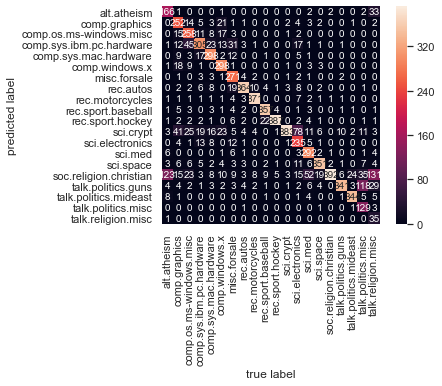

In [10]:
#creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=True,xticklabels=train.target_names,yticklabels=train.target_names)
#plotting heatmap of confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted label')

In [22]:
#predicting labels on new data
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    print(pred)
    return train.target_names[pred[0]]

In [23]:
predict_category('School Shooting in Columbine')

[16]


'talk.politics.guns'